In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# read data
df = pd.read_csv('../数据/future_price.csv')
df['date'] = pd.to_datetime(df['date'])

all_categories = df['name'].unique()
print('All categories: {}'.format(all_categories))

All categories: ['螺纹钢' '线材' '沪铜' '沪铝' '橡胶' '燃油' '沪锌' '黄金' '白银' '沥青' '热轧卷板' '沪镍' '沪铅' '原油'
 '沪锡' '纸浆' '豆一' '豆二' '玉米' '玉米淀粉' '乙二醇' '纤维板' '铁矿石' '焦炭' '鸡蛋' '焦煤' '塑料'
 '豆粕' '棕榈' 'PP' 'PVC' '豆油' '鲜苹果' '棉花' '红枣' '棉纱' '玻璃' '粳稻' '晚籼稻' '郑醇' '菜油'
 '早籼稻' '菜粕' '菜籽' '硅铁' '锰硅' '白糖' 'PTA' '强麦' '动力煤']


In [14]:
def get_price_series(name, n_points=90, field='close'):
    s = df[df['name']==name]
    s = s.set_index('date').sort_index()[field]
    return s.tail(n_points)

get_price_series('螺纹钢', n_points=90)

date
2022-02-14    4817.0
2022-02-15    4728.0
2022-02-16    4832.0
2022-02-17    4686.0
2022-02-18    4779.0
               ...  
2022-06-20    4149.0
2022-06-21    4224.0
2022-06-22    4128.0
2022-06-23    4235.0
2022-06-24    4189.0
Name: close, Length: 90, dtype: float64

# Plotting

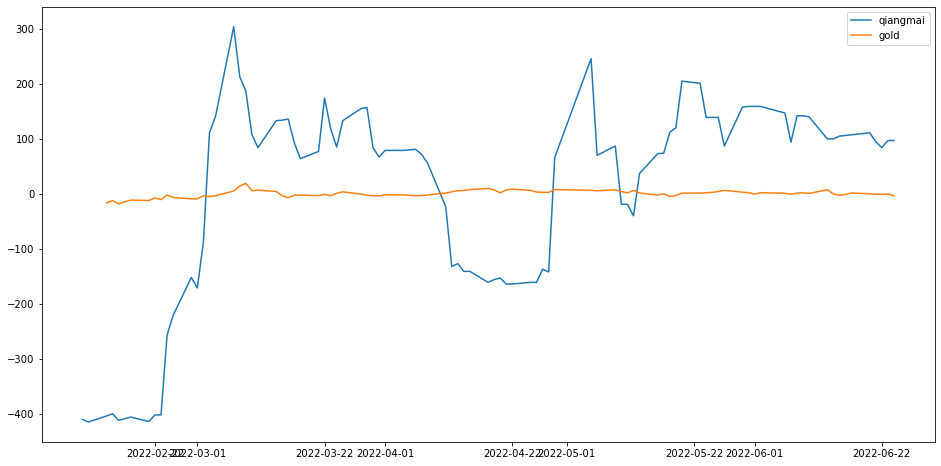

In [35]:
_ = plt.subplots(figsize=(16, 8))

plot_categories = [('强麦', 'qiangmai'), 
                ('黄金', 'gold'),
                ]
length = 90

for c, alias in plot_categories:
    s = get_price_series(c, length)
    s -= s.mean()
    plt.plot(s, label=alias)
plt.legend()

## Correlation Matrix

In [36]:
start_date = '20211001'

df_s = df[df['date'].dt.strftime('%Y%m%d') >= start_date]
df_s.head()

,date,open,high,low,close,volume,code,name
3045,2021-10-01,5635.0,5730.0,5585.0,5706.0,1968234,RB0,螺纹钢
3046,2021-10-08,5775.0,5843.0,5701.0,5750.0,1384149,RB0,螺纹钢
3047,2021-10-11,5759.0,5870.0,5738.0,5808.0,2233485,RB0,螺纹钢
3048,2021-10-12,5803.0,5812.0,5553.0,5562.0,2862726,RB0,螺纹钢
3049,2021-10-13,5534.0,5566.0,5267.0,5421.0,3359719,RB0,螺纹钢


In [37]:
df_s.pivot_table(index='date', columns=['name'], values=['close']).corr()

close                                                    \
name              PP       PTA       PVC       乙二醇       动力煤        原油   
      name                                                               
close PP    1.000000  0.409100  0.796091  0.744534  0.723850  0.412063   
      PTA   0.409100  1.000000 -0.097408 -0.068708  0.034716  0.951473   
      PVC   0.796091 -0.097408  1.000000  0.853986  0.842409 -0.132428   
      乙二醇   0.744534 -0.068708  0.853986  1.000000  0.904929 -0.139181   
      动力煤   0.723850  0.034716  0.842409  0.904929  1.000000 -0.049397   
      原油    0.412063  0.951473 -0.132428 -0.139181 -0.049397  1.000000   
      塑料    0.929006  0.226102  0.812793  0.762030  0.654536  0.238316   
      强麦    0.609582  0.778677 -0.038555 -0.100738  0.691606  0.892054   
      早籼稻   0.015779  0.767152 -0.296770 -0.555980 -0.480082  0.817607   
      晚籼稻   0.586045 -0.853217  0.831293  0.350923 -0.344719 -0.571803   
      棉纱    0.287086 -0.402099  0.486294  0.540726  0.354679 -0.345457   
      棉花    0.369009 -0.058357  0.426504  0.388840  0.265527  0.013940   
      棕榈    0.433408  0.798013 -0.027046 -0.078917  0.002339  0.884995   
      橡胶   -0.097911 -0.263075  0.114483  0.102265  0.039380 -0.305307   
      沥青    0.310059  0.965974 -0.194939 -0.192885 -0.100907  0.923165   
      沪铅   -0.060943 -0.242043  0.006574  0.102479  0.061037 -0.149868   
      沪铜    0.465250  0.402449  0.324333  0.218371  0.263617  0.493261   
      沪铝    0.666877  0.254622  0.588937  0.495020  0.423824  0.299710   
      沪锌    0.375413  0.694186  0.064495 -0.055733  0.046754  0.732780   
      沪锡    0.158175 -0.037201  0.132337 -0.061032 -0.204620  0.147205   
      沪镍    0.313319  0.786612 -0.132359 -0.268960 -0.183203  0.885002   
      热轧卷板  0.831272  0.191679  0.824738  0.657191  0.651957  0.229229   
      焦炭    0.693802  0.534031  0.509400  0.350307  0.457186  0.572155   
      焦煤    0.823054  0.513580  0.640101  0.496888  0.585792  0.541389   
      燃油    0.436433  0.918612 -0.052915 -0.126412 -0.012729  0.966729   
      玉米   -0.006333  0.747654 -0.428514 -0.530746 -0.421227  0.815805   
      玉米淀粉  0.209484  0.483372 -0.138224 -0.222626 -0.116208  0.655316   
      玻璃    0.548133 -0.073241  0.722439  0.563525  0.491007 -0.097938   
      白糖   -0.181133  0.801282 -0.461853 -0.618749 -0.474630  0.800209   
      白银    0.320465 -0.011514  0.240390  0.117100  0.112365  0.187572   
      硅铁    0.802688  0.004562  0.936649  0.851103  0.901189 -0.052359   
      粳稻    0.120814  0.613588 -0.176433 -0.360407 -0.322653  0.745048   
      红枣   -0.271068 -0.822806  0.182220  0.213911  0.166153 -0.817490   
      纤维板   0.682585  0.333405  0.466663  0.596411  0.649603  0.332717   
      纸浆    0.177407  0.788612 -0.231101 -0.378959 -0.313643  0.835419   
      线材    0.774179  0.456891  0.636612  0.424238  0.467223  0.494992   
      菜油    0.224968  0.777769 -0.193960 -0.175217 -0.033971  0.781128   
      菜籽    0.192778  0.565590 -0.085623  0.020693  0.188228  0.490824   
      菜粕    0.228085  0.772472 -0.218351 -0.352702 -0.284438  0.873340   
      螺纹钢   0.802884  0.305662  0.759171  0.565925  0.556791  0.307765   
      豆一    0.273805  0.418998  0.026351 -0.011454  0.010063  0.449713   
      豆二    0.315343  0.885775 -0.132056 -0.229179 -0.100584  0.911167   
      豆油    0.424546  0.916303 -0.046069 -0.037703  0.101687  0.906628   
      豆粕    0.341300  0.875465 -0.137667 -0.229630 -0.116897  0.934089   
      郑醇    0.919555  0.176654  0.898560  0.847346  0.837901  0.171758   
      铁矿石   0.417852  0.804893  0.072000 -0.095930 -0.038719  0.797630   
      锰硅    0.781787 -0.056732  0.927224  0.877180  0.895157 -0.112683   
      鲜苹果  -0.046635  0.549514 -0.436455 -0.438132 -0.460385  0.668471   
      鸡蛋    0.310244  0.611750  0.071271  0.003469  0.256026  0.577034   
      黄金    0.240102  0.822771 -0.250617 -0.349341 -0.216248  0.915591   

                                                    ...                      \
name         

# Clustering